In [1]:
!pip install tweepy
!pip install python-dotenv


In [19]:
!pip install chartify

     ---------------------------------------- 64.0/64.0 kB 3.6 MB/s eta 0:00:00
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
     ---------------------------------------- 1.4/1.4 MB 14.7 MB/s eta 0:00:00
     ---------------------------------------- 8.3/8.3 MB 44.0 MB/s eta 0:00:00
     ---------------------------------------- 6.6/6.6 MB 46.4 MB/s eta 0:00:00
     ---------------------------------------- 56.5/56.5 kB ? eta 0:00:00
     ---------------------------------------- 160.2/160.2 kB ? eta 0:00:00
  Using cached ipywidgets-8.0.6-py3-none-any.whl (138 kB)
  Using cached widgetsnbextension-4.0.7-py3-none-any.whl (2.1 MB)
  Using cached jupyterlab_widgets-3.0.7-py3-none-any.whl (198 kB)
     ---------------------------------------- 384.9/384.9 kB ? eta 0:00:00
     ---------------------------------------- 58.3/58.3 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.5.2
    Uninstalling widgetsnbextension

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.
panel 0.13.1 requires bokeh<2.5.0,>=2.4.0, but you have bokeh 3.1.1 which is incompatible.


In [11]:
import os
import tweepy
from dotenv import load_dotenv
import pandas as pd
load_dotenv()
consumer_key = os.environ["API_KEY"]
consumer_secret = os.environ["API_KEY_SECRET"]
access_token = os.environ["ACCESS_TOKEN"]
access_token_secret = os.environ["ACCESS_TOKEN_SECRET"]

auth = tweepy.OAuth1UserHandler(
  consumer_key, 
  consumer_secret, 
  access_token, 
  access_token_secret
)

api = tweepy.API(auth)

In [14]:
# function to display data of each tweet
def printtweetdata(n, ith_tweet):
        print()
        print(f"Tweet {n}:")
        print(f"Username:{ith_tweet[0]}")
        print(f"Description:{ith_tweet[1]}")
        print(f"Location:{ith_tweet[2]}")
        print(f"Following Count:{ith_tweet[3]}")
        print(f"Follower Count:{ith_tweet[4]}")
        print(f"Total Tweets:{ith_tweet[5]}")
        print(f"Retweet Count:{ith_tweet[6]}")
        print(f"Tweet Text:{ith_tweet[7]}")
        print(f"Hashtags Used:{ith_tweet[8]}")
 
 
# function to perform data extraction
def scrape(words, date_since, numtweet):
 
        # Creating DataFrame using pandas
        db = pd.DataFrame(columns=['username',
                                   'description',
                                   'location',
                                   'following',
                                   'followers',
                                   'totaltweets',
                                   'retweetcount',
                                   'text',
                                   'hashtags'])
 
        # We are using .Cursor() to search
        # through twitter for the required tweets.
        # The number of tweets can be
        # restricted using .items(number of tweets)
        tweets = tweepy.Cursor(api.search_tweets,
                               words, lang="en",
                               since_id=date_since,
                               tweet_mode='extended').items(numtweet)
 
 
        # .Cursor() returns an iterable object. Each item in
        # the iterator has various attributes
        # that you can access to
        # get information about each tweet
        list_tweets = [tweet for tweet in tweets]
 
        # Counter to maintain Tweet Count
        i = 1
 
        # we will iterate over each tweet in the
        # list for extracting information about each tweet
        for tweet in list_tweets:
                username = tweet.user.screen_name
                description = tweet.user.description
                location = tweet.user.location
                following = tweet.user.friends_count
                followers = tweet.user.followers_count
                totaltweets = tweet.user.statuses_count
                retweetcount = tweet.retweet_count
                hashtags = tweet.entities['hashtags']
 
                # Retweets can be distinguished by
                # a retweeted_status attribute,
                # in case it is an invalid reference,
                # except block will be executed
                try:
                        text = tweet.retweeted_status.full_text
                except AttributeError:
                        text = tweet.full_text
                hashtext = list()
                for j in range(0, len(hashtags)):
                        hashtext.append(hashtags[j]['text'])
 
                # Here we are appending all the
                # extracted information in the DataFrame
                ith_tweet = [username, description,
                             location, following,
                             followers, totaltweets,
                             retweetcount, text, hashtext]
                db.loc[len(db)] = ith_tweet
 
                # Function call to print tweet data on screen
                #printtweetdata(i, ith_tweet)
                i = i+1
        filename = 'scraped_tweets.csv'
 
        # we will save our database as a CSV file.
        return db

In [25]:
df = scrape('#war', '2023-05-05', 50)
df.head(10)

,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,JCrochunis,"Love my country, Joe Biden Is NOT My President...","Pennsylvania, USA",3932,2124,225965,223,"🇬🇧|At the #G7 meeting with the #USA and #EU, w...","[G7, USA, EU, Russia]"
1,ewebhines,,,152,151,7984,68,Put aside your affiliations and rhetoric.\n\nW...,[]
2,marce64693805,Hincha de Boca Juniors,,47,13,1336,0,"russia has fired 8,000 missiles of various typ...",[]
3,orangepallmall2,"Part time vampire.\nAttacked, but still standi...",Out Wesht,337,182,4672,8,Tell me there's no russian propaganda on here ...,"[Ukraine, Russia, War, NAFO, NATO, Bakhmut]"
4,CarranzaYazman1,|hello No-Surviv I am a beyblade fan | I’m 🇺🇸/...,Shut up avenue,3012,513,10158,8,Tell me there's no russian propaganda on here ...,"[Ukraine, Russia, War, NAFO, NATO, Bakhmut]"
5,rogabooks,Selling Rare Books & Manuscripts from the 15th...,"Naples, FL",19,205,34,0,https://t.co/5SErZde1Hb\nENDING SOON NO RESERV...,"[book, books, history, love, biblio, biography..."
6,Chaganistan,"Father, teacher, anti-imperialist, eco-sociali...","Weston, Toronto",1299,618,4614,14,A friendly reminder to the world: There is not...,[Canadian]


In [31]:
import chartify  
# Plot the data
df_first_20 = df.head(20)    
ch = chartify.Chart(blank_labels=True)    
ch.plot.scatter(
        data_frame=df_first_20,
        x_column="following",
        y_column="retweetcount",
        color_column="username",
)
ch.style.color_palette.reset_palette_order()
ch.plot.text(
        data_frame=df_first_20,
        x_column="following",
        y_column="retweetcount",
        text_column="username",
        color_column="username",
        x_offset=1,
        y_offset=-1,
        font_size="10pt",
)
ch.set_title("Text")
ch.set_subtitle("Labels for specific observations.")
ch.show()

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt


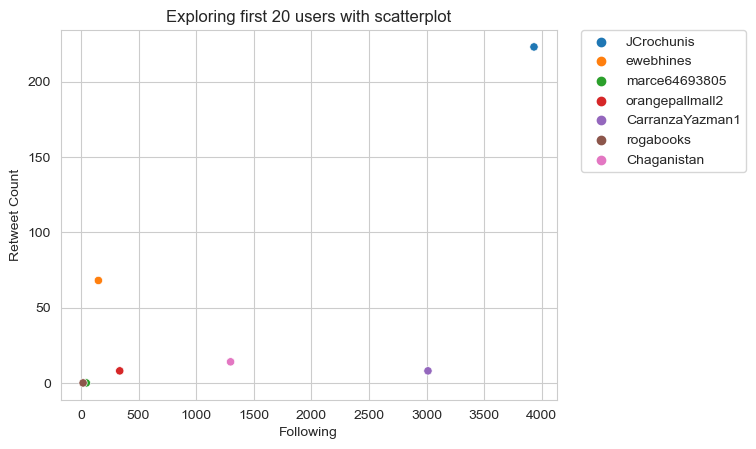

In [34]:
sns.set_style(style='whitegrid')


sns.scatterplot(
    data=df_first_20, 
    x='following', 
    y='retweetcount', 
    hue='username'
    )

plt.title('Exploring first 20 users with scatterplot')
plt.xlabel('Following')
plt.ylabel('Retweet Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.show()

In [45]:
# Barplot using chartify , one big difference is the bars are ordered by internally

ch = chartify.Chart(blank_labels=True, x_axis_type='categorical')
ch.set_title("Users with most retweet count")

ch.plot.bar(
        data_frame=df_first_20,
        categorical_columns=['username'],
        numeric_column='retweetcount')
ch.show()

<AxesSubplot:xlabel='username', ylabel='retweetcount'>

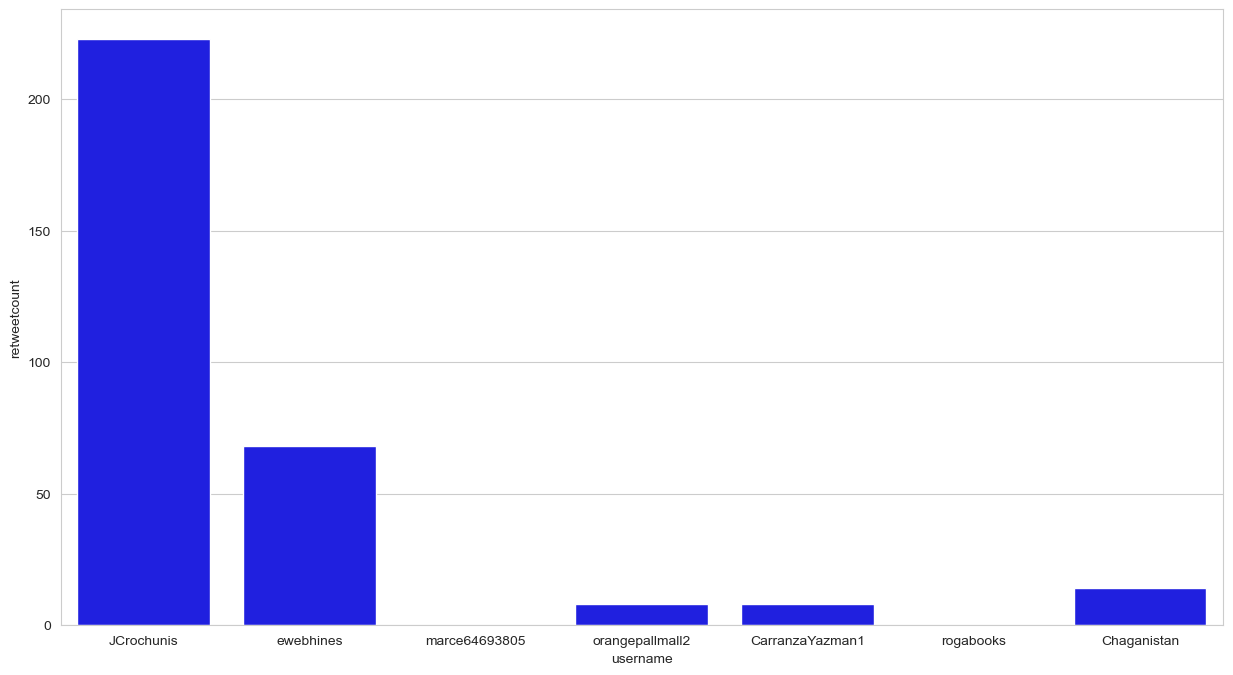

In [43]:
## Barplot using seaborn, difference is seaborn doesnt apply any order in the plot

plt.figure(figsize=(15,8))
sns.barplot(x = 'username', y = 'retweetcount', data = df_first_20,
            label = 'Total', color = 'b', edgecolor = 'w')

In [53]:
(
chartify.Chart(blank_labels=True, x_axis_type="categorical")
        .set_title("Stacked bar chart")
        .plot.bar_stacked(
            data_frame=df,
            categorical_columns=["location"],
            numeric_column="totaltweets",
            stack_column="username",
            normalize=False,
        ).show()
    )


AttributeError: Plot `histogram` not avaiable for the given Chart.
            Try changing the Chart parameters x_axis_type and y_axis_type.
            